In [1]:
## projet présenté porte sur le sujet 2 de scraping du site imb, à cet effet je vous mettez ici le lien github du projet complet, le sujet de scaping de données est le numéro 2.
## https://github.com/amoungui/my_scrapping_project/tree/master
https://github.com/amoungui/my_scrapping_project/tree/master

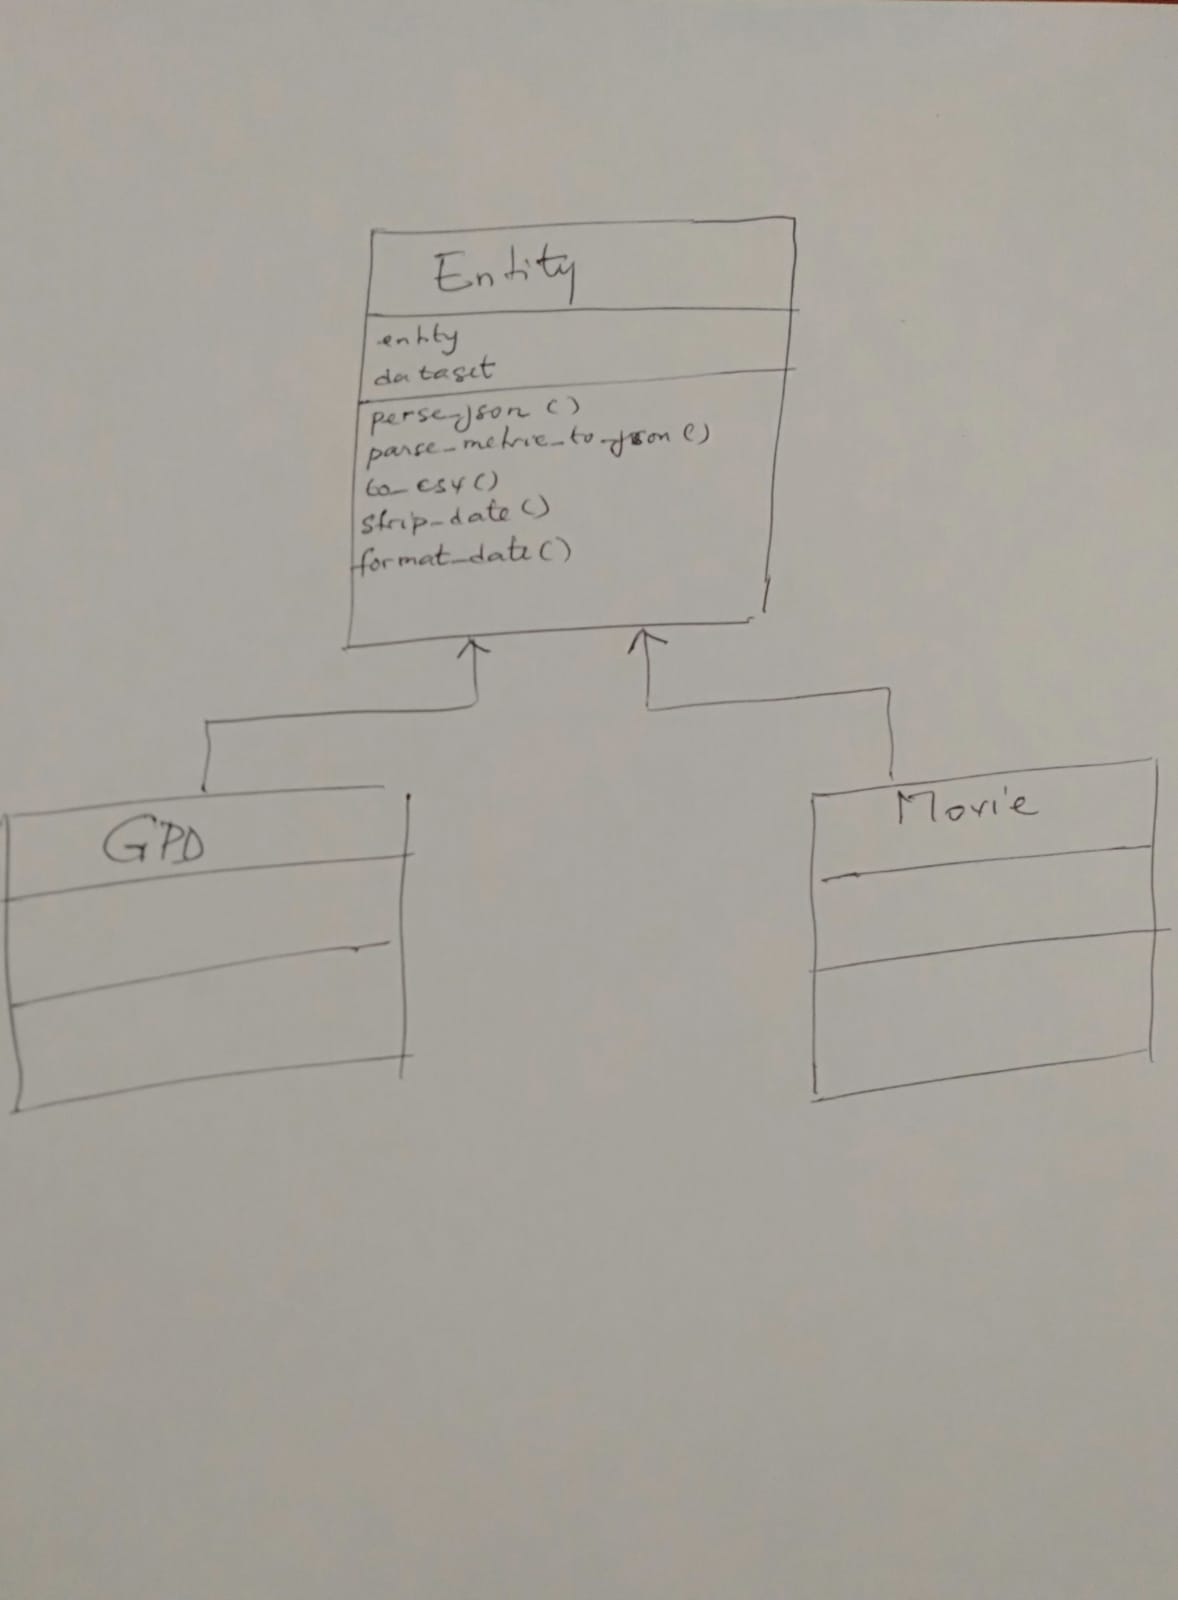

In [4]:
from IPython.display import Image
Image("img/diagrame_de_classes.jpeg", width=50, height=50)

In [80]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [81]:
df = pd.read_csv("data/dataset.csv")

In [82]:
len(df)#df.head(5) #

5

In [ ]:
# Avant tout chose nous devons formater les données du dataset

In [83]:
# formatage sur les date car il y a des films qui n'ont pas de date de sortie
def format(x):
    if 'xxx' in x :
        return '2000-01-01'
    if 'xxx' not in x :
        return x
df['release date'] = df['release date'].apply(lambda x: format(x))        

In [84]:
# convertion des montant car il y en a des films qui n'ont de budget en RI 
def convert_(x):
    if x in 'xxx' or 'INR' in x:
        return 1

    else:
        return float(x) # INR56300000            

In [85]:
df['Cumulate Worldwide Gross en $'] = df['Cumulate Worldwide Gross en $'].apply(lambda x: convert_(x))

In [86]:
df['budget en $'] = df['budget en $'].apply(lambda x: convert_(x))

In [38]:
## 1. Distribution des films par catégorie 

In [87]:
data1 = df
data1 = data1.set_index('type')
data1.groupby('type')['title'].apply(lambda x: x)

type
Comedy; Drama       Hababam Sinifi
Drama                   Les Évadés
Drama              Soorarai Pottru
Crime; Mystery;           Aynabaji
Crime; Drama            Le parrain
Name: title, dtype: object

In [89]:
## 2. Top 50 des budgets des films
data2 = df
data2[['budget en $', 'title']].sort_values('budget en $', ascending=False).head(50)

,budget en $,title
1,25000000.00,Les Évadés
3,6000000.00,Le parrain
4,2058671.99,Soorarai Pottru
2,413015.43,Aynabaji
0,1.00,Hababam Sinifi


In [33]:
## 3. Nombre de films sortie par décennie

In [91]:
df['release date'] = pd.to_datetime(df['release date'])
data3 = df.set_index('release date')
data3.groupby((data3.index.year//10)*10).sum()

,rating,vote,reviews,budget en $,Cumulate Worldwide Gross en $
release date,,,,,
1970,18.5,1697482,4479,6000001.00,246120987.0
1990,9.3,2395336,9086,25000000.00,28817291.0
2010,9.2,23851,173,413015.43,1.0
2020,9.1,79151,1965,2058671.99,1.0


In [59]:
## 4 Top 20 films ayant générés le plus de revenu, le moins de revenu.

In [60]:
## 4.1. Top 20 films ayant générés le plus de revenu.

In [92]:
data4 = df
data4[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=False).head(10)

,title,Cumulate Worldwide Gross en $
3,Le parrain,246120986.0
1,Les Évadés,28817291.0
0,Hababam Sinifi,1.0
2,Aynabaji,1.0
4,Soorarai Pottru,1.0


In [38]:
## 4.2. Top 20 films ayant générés le moins de revenu.

In [93]:
data5 = df
data5[['title', 'Cumulate Worldwide Gross en $']].sort_values('Cumulate Worldwide Gross en $', ascending=False).tail(5)

,title,Cumulate Worldwide Gross en $
3,Le parrain,246120986.0
1,Les Évadés,28817291.0
0,Hababam Sinifi,1.0
2,Aynabaji,1.0
4,Soorarai Pottru,1.0


In [40]:
## 5. Analyse de la popularité des films en fonction de leurs budgets

In [95]:
data6 = df
data6 = data4.set_index('budget en $')
data6.groupby(by='budget en $', axis=0, sort=True)[['title', 'vote']].apply(lambda x: x).sort_values('budget en $', ascending=False)

,title,vote
budget en $,,
25000000.00,Les Évadés,2395336
6000000.00,Le parrain,1659254
2058671.99,Soorarai Pottru,79151
413015.43,Aynabaji,23851
1.00,Hababam Sinifi,38228


In [ ]:
## 6. Distribution des revenus générés par genre de film

In [96]:
data7 = df
data7 = data7.set_index('type')
data7.groupby(by='type')[['title', 'gross en $']].apply(lambda x: x).sort_values('gross en $', ascending=True)

,title,gross en $
type,,
Crime; Drama,Le parrain,134966411
Drama,Les Évadés,28699976
Comedy; Drama,Hababam Sinifi,xxx
Drama,Soorarai Pottru,xxx
Crime; Mystery;,Aynabaji,xxx


In [ ]:
## 7. Top 10 des films par retour sur investissement

In [97]:
data8 = df
data8['roi'] = data8['budget en $']/data8['Cumulate Worldwide Gross en $']

In [98]:
data8['roi'].sort_values()

3    2.437825e-02
1    8.675347e-01
0    1.000000e+00
2    4.130154e+05
4    2.058672e+06
Name: roi, dtype: float64

In [45]:
## 8. Note moyenne par année de sortie de film

In [100]:
data9 = df
data9 = data9.set_index('release date')
data9.groupby(by=data9.index.year, axis=0, sort=True)[['title', 'rating']].sum().sort_values('rating', ascending=False)

,rating
release date,
1975,9.3
1995,9.3
1972,9.2
2016,9.2
2020,9.1


In [71]:
## Mes propositions d'analyse du dataset

In [72]:
## 9. calculer le ration des budgets des films sorties par pays par année

In [101]:
def convert_int(x):
    if x in 'xxx':
        return 0
    else:
        return float(x) # .replace('.', '')

In [102]:
data10 = df
data10.pivot_table(values='budget en $', index='release date', columns='release country')

release country,Bangladesh,India,Turkey,USA
release date,,,,
1972-10-18,NaN,NaN,NaN,6000000.0
1975-04-01,NaN,NaN,1.0,NaN
1995-03-01,NaN,NaN,NaN,25000000.0
2016-11-17,413015.43,NaN,NaN,NaN
2020-11-11,NaN,2058671.99,NaN,NaN


In [ ]:
## 10. Determiner le score et types de film produit par auteur(writter) 

In [103]:
data11 = df
data11['score'] = data11['score'].apply(lambda x: convert_int(x))
data_pivot = data11.pivot_table(values='score', index='writter', columns='type')
data_pivot

type,Comedy; Drama,Crime; Drama,Crime; Mystery;,Drama
writter,,,,
Mario Puzo,NaN,100.0,NaN,NaN
Stephen King,NaN,NaN,NaN,80.0
Sudha Kongara,NaN,NaN,NaN,0.0
Syed Gaosul Alam Shaon,NaN,NaN,0.0,NaN
Umur Bugay,0.0,NaN,NaN,NaN


In [104]:
## 11. determination du nombre de vote total que chaque compositeur (Writter) a pu avoir dans toute sa carrière de cinéaste
data_pivot.sum(axis=1)

writter
Mario Puzo                100.0
Stephen King               80.0
Sudha Kongara               0.0
Syed Gaosul Alam Shaon      0.0
Umur Bugay                  0.0
dtype: float64

In [ ]:
## représentation du budget de réalisation en fonction du retour sur investissement

C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2056: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
C:\Users\Amoungui\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2065: FutureWarning: Using `vertical=True` to control the orientation of the plot  is deprecated. Instead, assign the data directly to `y`. 
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget en $', ylabel='Cumulate Worldwide Gross en $'>

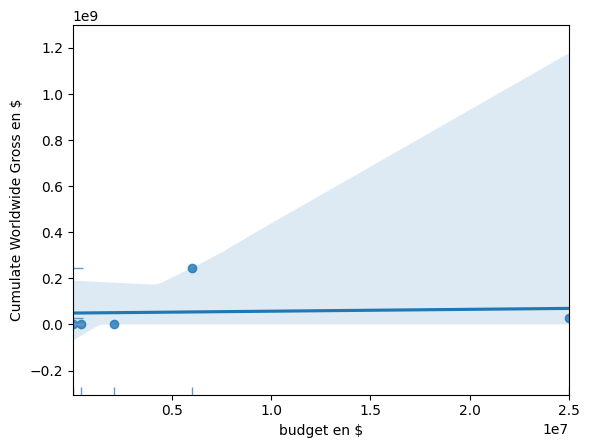

In [105]:
fig, ax = plt.subplots()
sns.regplot(x="budget en $", y="Cumulate Worldwide Gross en $", data=df, ax=ax, lowess=False)  
# adding the small lines to indicate individual data points
sns.rugplot(df["budget en $"].dropna(), axis='x', 
            color="#6699cc", height=0.02, ax=ax)
sns.rugplot(df["Cumulate Worldwide Gross en $"].dropna(), axis='y', 
            color="#6699cc", height=0.02, ax=ax)